In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df=pd.read_csv('credit_risk_dataset.csv')

In [6]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [7]:
df.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [8]:
df['person_emp_length']=df['person_emp_length'].fillna(df['person_emp_length'].mean())
df['loan_int_rate']=df['loan_int_rate'].fillna(df['loan_int_rate'].mean())

In [9]:
df.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

### **Business Scenario**
- A fintech company provides instant credit limits to customers using a mobile app.
- Instead of using complex models, the company wants a similarity-based system that works like:
  - “Show me customers similar to this new customer, and decide risk accordingly.”
- Challenges:
  - Customers are not easily separable by straight lines
  - Decisions depend on nearness, not formulas
  - Feature scale (income vs age) matters a lot
  - The system must be interactive and explainable

- Load the dataset and explore customer attributes such as:
  - Age
  - Income
  - Loan amount
  - Credit history
- Identify which features should be used to measure customer similarity.

- Prepare the data so that distance-based comparison is meaningful.
- Explain why preprocessing is necessary for this algorithm.
- Build a classification model that:
  - Assigns a customer to High Risk or Low Risk
  - Makes decisions based on nearest neighbors
- Train the model using historical customer data.
- Experiment with different values of K.

In [10]:
#encoding
#ordinal
grade_map = {'A':1, 'B':2, 'C':3, 'D':4, 'E':5, 'F':6, 'G':7}
df['loan_grade'] = df['loan_grade'].map(grade_map)
#binary
df['cb_person_default_on_file'] = df['cb_person_default_on_file'].map({'Y':1, 'N':0})
#one-hot encoding
df = pd.get_dummies(
    df,
    columns=['person_home_ownership', 'loan_intent'],
    drop_first=True
)

In [11]:
X = df.drop('loan_status',axis=1)
y = df['loan_status']


In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)


In [14]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5,metric='minkowski')
knn.fit(X_train, y_train)


,"n_neighbors n_neighbors: int, default=5Number of neighbors to use by default for :meth:`kneighbors` queries.",5
,"weights weights: {'uniform', 'distance'}, callable or None, default='uniform'Weight function used in prediction. Possible values:- 'uniform' : uniform weights. All points in each neighborhood are weighted equally.- 'distance' : weight points by the inverse of their distance. in this case, closer neighbors of a query point will have a greater influence than neighbors which are further away.- [callable] : a user-defined function which accepts an array of distances, and returns an array of the same shape containing the weights.Refer to the example entitled:ref:`sphx_glr_auto_examples_neighbors_plot_classification.py`showing the impact of the `weights` parameter on the decisionboundary.",'uniform'
,"algorithm algorithm: {'auto', 'ball_tree', 'kd_tree', 'brute'}, default='auto'Algorithm used to compute the nearest neighbors:- 'ball_tree' will use :class:`BallTree`- 'kd_tree' will use :class:`KDTree`- 'brute' will use a brute-force search.- 'auto' will attempt to decide the most appropriate algorithm based on the values passed to :meth:`fit` method.Note: fitting on sparse input will override the setting ofthis parameter, using brute force.",'auto'
,"leaf_size leaf_size: int, default=30Leaf size passed to BallTree or KDTree. This can affect thespeed of the construction and query, as well as the memoryrequired to store the tree. The optimal value depends on thenature of the problem.",30
,"p p: float, default=2Power parameter for the Minkowski metric. When p = 1, this is equivalentto using manhattan_distance (l1), and euclidean_distance (l2) for p = 2.For arbitrary p, minkowski_distance (l_p) is used. This parameter is expectedto be positive.",2
,"metric metric: str or callable, default='minkowski'Metric to use for distance computation. Default is ""minkowski"", whichresults in the standard Euclidean distance when p = 2. See thedocumentation of `scipy.spatial.distance`_ andthe metrics listed in:class:`~sklearn.metrics.pairwise.distance_metrics` for valid metricvalues.If metric is ""precomputed"", X is assumed to be a distance matrix andmust be square during fit. X may be a :term:`sparse graph`, in whichcase only ""nonzero"" elements may be considered neighbors.If metric is a callable function, it takes two arrays representing 1Dvectors as inputs and must return one value indicating the distancebetween those vectors. This works for Scipy's metrics, but is lessefficient than passing the metric name as a string.",'minkowski'
,"metric_params metric_params: dict, default=NoneAdditional keyword arguments for the metric function.",None
,"n_jobs n_jobs: int, default=NoneThe number of parallel jobs to run for neighbors search.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details.Doesn't affect :meth:`fit` method.",None


In [15]:
from sklearn.metrics import accuracy_score, confusion_matrix

y_pred = knn.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.8935092834126132
Confusion Matrix:
 [[4945  127]
 [ 567  878]]


<Axes: >

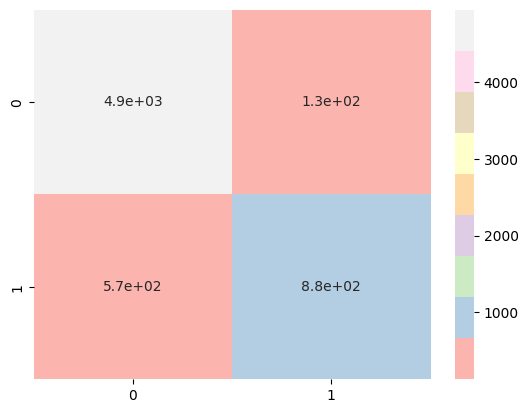

In [18]:
sns.heatmap(confusion_matrix(y_test, y_pred),annot=True,cmap='Pastel1')



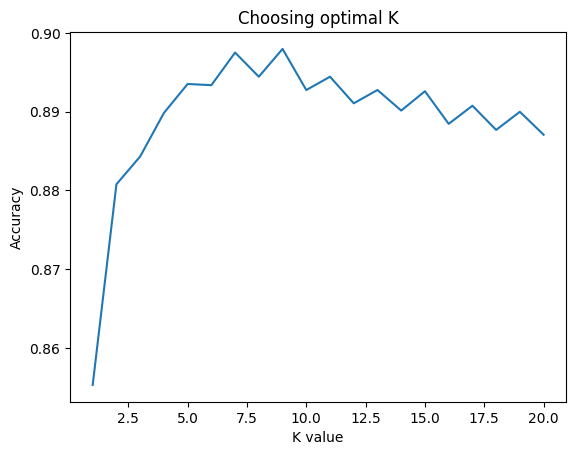

In [19]:
import matplotlib.pyplot as plt

acc = []

for k in range(1, 21):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc.append(accuracy_score(y_test, y_pred))

plt.plot(range(1, 21), acc)
plt.xlabel("K value")
plt.ylabel("Accuracy")
plt.title("Choosing optimal K")
plt.show()

***Since customers are not linearly separable and decisions depend on similarity, a K-Nearest Neighbors classifier is suitable. Feature scaling is required because KNN relies on distance, and unscaled features like income would dominate similarity calculations. The model assigns a customer to high or low risk based on the majority class among the nearest customers.***